<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/Classifier_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls -a

.  ..  .config	sample_data


In [ ]:
%%capture
!pip install fastbook

In [38]:
import re
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pathlib
from IPython.display import Image
from google.colab import drive
import os
drive.mount('/content/drive')
config_file = Path("~/.fastai/config.yml").expanduser()
config.d
if config_file.exists(): os.remove(config_file)
assert not config_file.exists()
config = Config()
assert config_file.exists()
config['archive_path'] = Path('drive/archive')
config['data_path'] = Path('drive/data')
config['model_path'] = Path('drive/models')
config['storage_path'] = Path('root/tmp')
config.save()
print("Please continue")
config.d

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Please continue


{'archive_path': 'drive/archive',
 'data_path': 'drive/data',
 'model_path': 'drive/models',
 'storage_path': 'root/tmp',
 'version': 2}

In [45]:
path = Path('/content/drive/MyDrive/AC_Classifier/')
print(type(path))
path.ls()
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
print(len(files))
print(type(files))

<class 'pathlib.PosixPath'>
998
<class 'fastcore.foundation.L'>


In [44]:
print(files[0].name)
#def label_func(f): return re.sub("_[^_]+$", "",f) #rename folder based on filename
pat = r'^(.*)_\d+.jpg' #Image Categories from filename

In [60]:
dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())

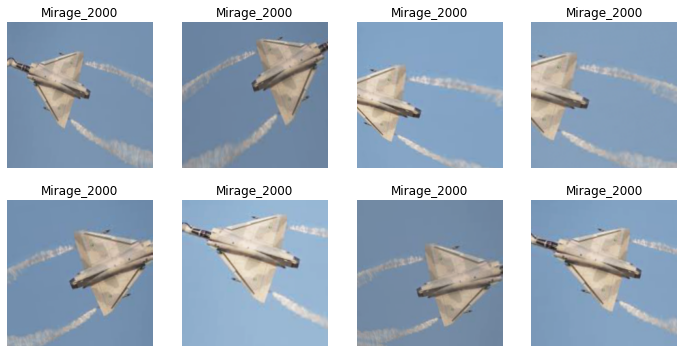

In [61]:
dls.train.show_batch(max_n=8,nrows=2, unique=True)

In [62]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.565184,2.968779,0.819095,00:06


epoch,train_loss,valid_loss,error_rate,time
0,3.254377,2.924115,0.804020,00:06
1,2.836771,2.770707,0.733668,00:06
2,2.385313,2.686705,0.703518,00:06
3,2.046752,2.633857,0.688442,00:06


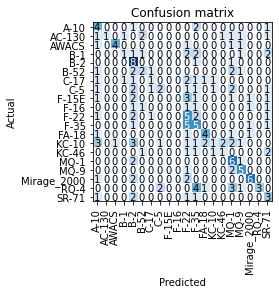

In [64]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

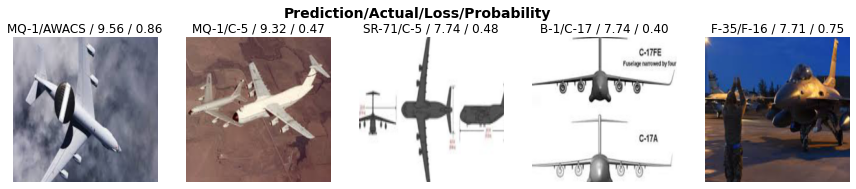

In [65]:
interp.plot_top_losses(5, nrows=1)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.007585775572806597)

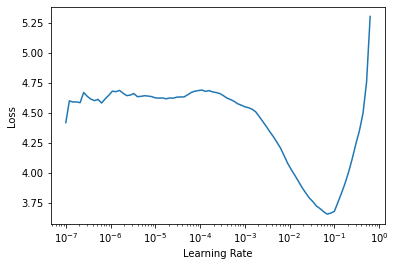

In [52]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.294198,1.009054,0.301759,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.509148,1.119417,0.313261,01:07
1,0.325311,0.868610,0.263870,01:06
